# Convolutional Neural Networks for Image Classification

Skin cancer is the most common human malignancy, is primarily diagnosed visually, beginning with an initial clinical screening and followed potentially by dermoscopic analysis, a biopsy and histopathological examination. Automated classification of skin lesions using images is a challenging task owing to the fine-grained variability in the appearance of skin lesions.

This the HAM10000 ("Human Against Machine with 10000 training images") dataset. It consists of 10015 dermatoscopic images which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

### The 7 different classes of skin cancer are as follows:
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :
- Step 1: Importing Essential Libraries
- Step 2: Making Dictionary of images and labels
- Step 3: Reading and Processing Data
- Step 4: Data Cleaning
- Step 5: Exploratory data analysis (EDA)
- Step 6: Loading & Resizing of images
- Step 7: Train Test Split
- Step 8: Normalization
- Step 9: Label Encoding
- Step 10: Train validation split
- Step 11: Model Building (U-Net)
- Step 12: Fitting the model
- Step 13: Model Evaluation (Testing and validation accuracy, confusion matrix, analysis of misclassified instances)


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029607.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029508.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030542.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033782.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029358.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031083.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033340.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034183.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032158.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034230.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029625.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034030.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033068.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032452.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032582.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033807.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033909.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033306.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030857.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034295.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029351.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033401.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031769.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032333.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031751.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032702.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033357.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032378.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030229.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029934.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032691.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028035.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026241.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027415.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024686.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025491.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027209.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026427.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027318.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025873.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026261.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027023.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027290.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025688.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026283.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026614.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028635.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025578.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025371.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027640.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025272.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027021.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025682.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026452.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027435.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0029296.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028195.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025327.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025877.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026703.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028940.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026302.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026525.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026031.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0029107.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029607.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029508.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030542.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033782.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029358.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031083.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033340.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0034183.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033067.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032627.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033399.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032931.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031268.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032693.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030039.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032792.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029703.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030652.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029355.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032227.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029885.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031301.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031466.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033563.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031239.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030809.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033908.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033554.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030245.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029475.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030307.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032171.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032993.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030007.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031116.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033261.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028035.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026241.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027415.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024686.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025491.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027209.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026427.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027318.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025873.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026261.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025303.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027516.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028702.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029093.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029273.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024371.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025943.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025868.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028280.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028693.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025744.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029139.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025670.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029005.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026730.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025087.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025254.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024910.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026708.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026410.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028405.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025107.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027399.jpg
/kaggle/input/skin-cancer-mn

In [2]:
#Import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
import random
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, MaxPool2D, UpSampling2D, Input, Reshape

from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# **Map dataset**

In [4]:
base_skin_dir = os.path.join('..', 'input/skin-cancer-mnist-ham10000')
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [5]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cPreview datasetell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [6]:
print(skin_df.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path', 'cell_type', 'cPreview datasetell_type_idx'],
      dtype='object')


# Preview dataset

In [7]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cPreview datasetell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/HAM10000_i...,Benign keratosis-like lesions,2


# **Data cleaning**

**Remove null values**

In [8]:
skin_df.isnull().sum()

lesion_id                        0
image_id                         0
dx                               0
dx_type                          0
age                             57
sex                              0
localization                     0
path                             0
cell_type                        0
cPreview datasetell_type_idx     0
dtype: int64

As it is evident from the above that only age has null values which is 57 so I will fill the null values by their mean.

In [9]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)
print(skin_df.dtypes)

lesion_id                        object
image_id                         object
dx                               object
dx_type                          object
age                             float64
sex                              object
localization                     object
path                             object
cell_type                        object
cPreview datasetell_type_idx       int8
dtype: object


In [10]:
skin_df.isnull().sum()

lesion_id                       0
image_id                        0
dx                              0
dx_type                         0
age                             0
sex                             0
localization                    0
path                            0
cell_type                       0
cPreview datasetell_type_idx    0
dtype: int64

**Distribution of the 7 different classes of cell types**

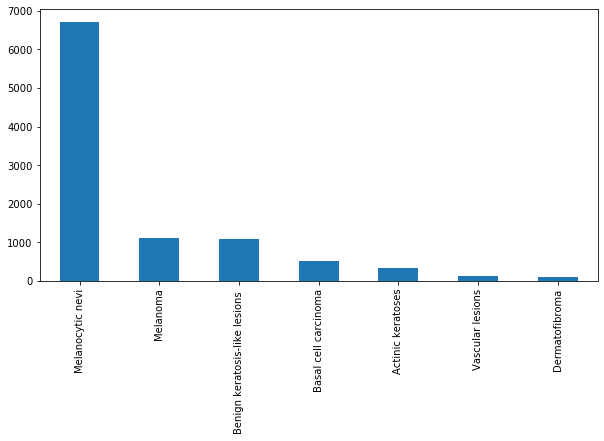

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

Its seems from the above plot that in this dataset cell type Melanecytic nevi has very large number of instances in comparison to other cell types

Results reveal an imbalanced dataset. Applying downsampling

In [12]:
from sklearn.utils import resample

samples_count = skin_df['cell_type'].value_counts()
majority_class = skin_df['cell_type'].isin([samples_count.idxmax()])
minority_class = skin_df['cell_type'].isin([samples_count.idxmin()])

df_majority = skin_df[majority_class]
df_minority = skin_df[minority_class]

print(skin_df['cell_type'].value_counts().idxmax())

Melanocytic nevi


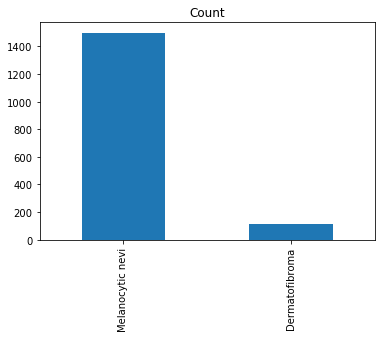

In [13]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=1500,    # to match minority class
                                 random_state=123)  # reproducible results
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['cell_type'].value_counts().plot(kind='bar', title='Count')

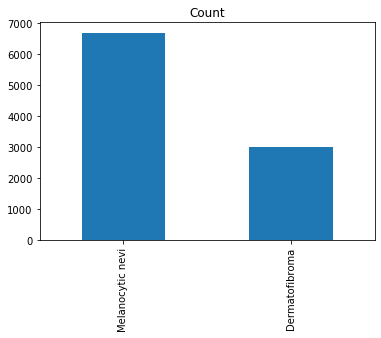

In [14]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=3000,    # to match majority class
                                 random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['cell_type'].value_counts().plot(kind='bar', title='Count')

In [15]:
skin_df = skin_df[skin_df['cell_type'] != skin_df['cell_type'].value_counts().idxmax()]
skin_df = pd.concat([skin_df, df_majority_downsampled], sort=True)
print(skin_df['cell_type'].value_counts())

Melanocytic nevi                  1500
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64


# Resampled Dataset

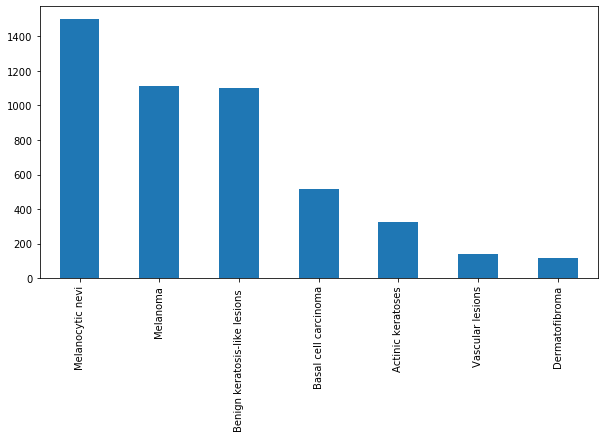

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories which are listed below :
1. Histopathology(Histo): Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists.
2. Confocal: Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level , and some facial benign with a grey-world assumption of all training-set images in Lab-color space before and after manual histogram changes.
3. Follow-up: If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years biologists accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions.
4. Consensus: For typical benign cases without histopathology or followup biologists provide an expert-consensus rating of authors PT and HK. They applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of groundtruth were usually photographed for educational reasons and did not need further follow-up or biopsy for confirmation.

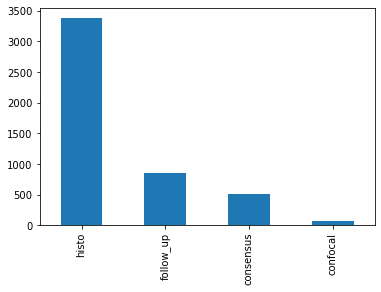

In [17]:
skin_df['dx_type'].value_counts().plot(kind='bar')

**Plotting the distribution of localization field**

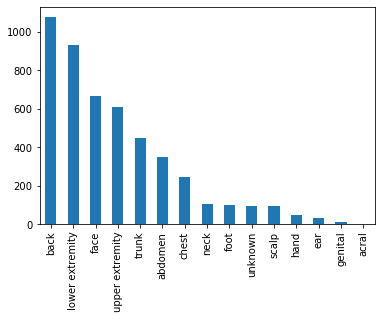

In [18]:
skin_df['localization'].value_counts().plot(kind='bar')

It seems back , lower extremity,trunk and upper extremity are heavily compromised regions of skin cancer

**Distribution of Age**

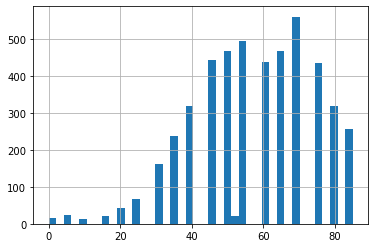

In [19]:
skin_df['age'].hist(bins=40)

It seems that there are larger instances of patients having age from 30 to 60

**Distribution of gender**

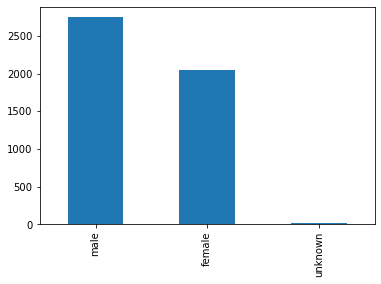

In [20]:
skin_df['sex'].value_counts().plot(kind='bar')

**Distribution of cancer type and age**

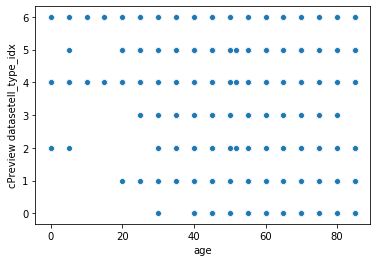

In [24]:
sns.scatterplot('age','cPreview datasetell_type_idx',data=skin_df)

It seems that skin cancer types 0,1,3 and 5 which are Melanocytic nevi,dermatofibroma,Basal cell carcinoma and Vascular lesions are not much prevalant below the age of 20 years

**Sexwise distribution of skin cancer type**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


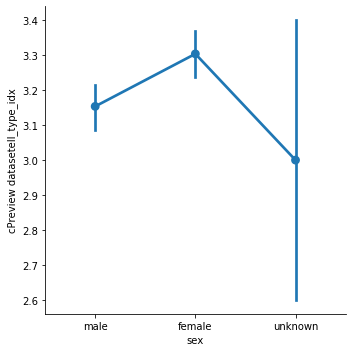

In [25]:
sns.factorplot('sex','cPreview datasetell_type_idx',data=skin_df)

# Resize images

In [26]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128,96))))

**Display sample images of each cancer type**

**What diseases do we have?**

In medicine the dx is an abbreviation for diagnosis and here these are short for.

From the original text about the dataset we have this quite technical medical detail
Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions:

- Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
- basal cell carcinoma (bcc)
- benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
- dermatofibroma (df)
- melanoma (mel)
- melanocytic nevi (nv)
- vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc). ### Simplified
- nv  →  melanocytic nevi  →  0
- mel  →  melanoma  →  1
- bcc  →  basal cell carcinoma  →  2
- akiec  →  Actinic keratoses and intraepithelial carcinoma  →  3
- vasc  →  vascular lesions  →  4
- bkl  →  benign keratosis-like lesions  →  5
- df  →  dermatofibroma  →  6

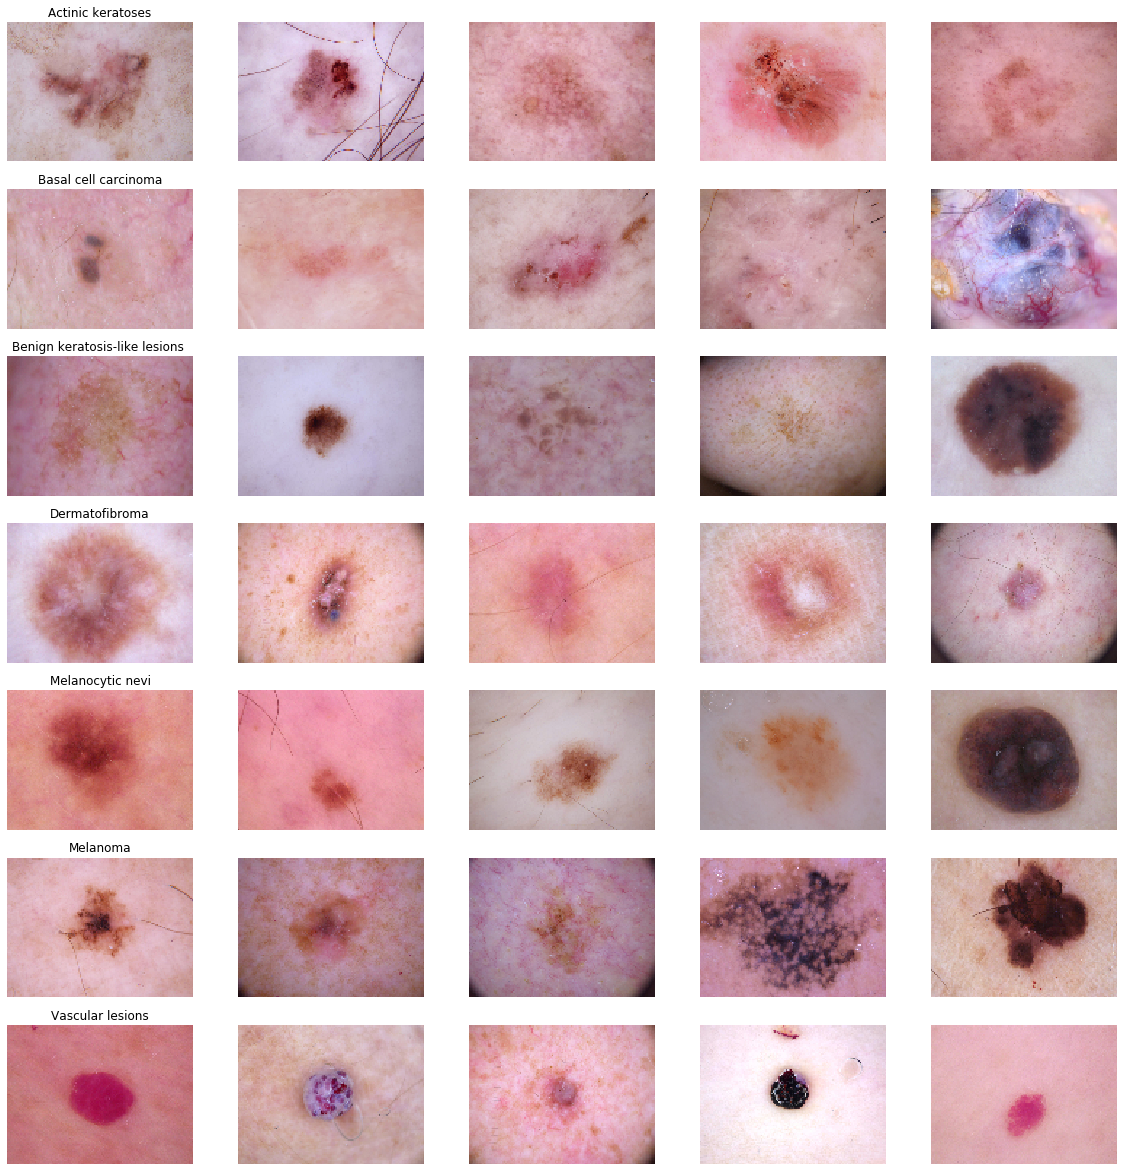

In [27]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [28]:
skin_df['image'].map(lambda x: x.shape).value_counts()

(96, 128, 3)    4810
Name: image, dtype: int64

### Set features and target

In [31]:
features = skin_df.drop(columns=['cPreview datasetell_type_idx'],axis=1)
target = skin_df['cPreview datasetell_type_idx']

### Split training set 90/10

In this step I have splitted the dataset into training and testing set of 90:10 ratio

In [32]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.10,random_state=1234)

### Normalization

I choose to normalize the x_train, x_test by substracting from their mean values and then dividing by thier standard deviation.

In [33]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

### Label Encoding
Labels are 7 different classes of skin cancer types from 0 to 6. I need to encode these lables to one hot vectors

In [34]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

### Split training and validation split
Training (70%)
Validation (30%)

In [35]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

### Reshape images into 3 dimensions

In [36]:
x_train = x_train.reshape(x_train.shape[0], *(96, 128, 3))
x_test = x_test.reshape(x_test.shape[0], *(96, 128, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(96, 128, 3))

In [37]:
print(np.bincount(skin_df['cPreview datasetell_type_idx']))

[ 327  514 1099  115 1500 1113  142]


# U-NET

Segmentation is especially preferred in applications such as remote sensing or tumor detection in biomedicine. U-Net consists of a contracting path (left side) and an expansive path (right side). 
![](http://miro.medium.com/max/1400/0*HSX89sT__0ZsWJRE.png)

**The image segmentation problem is divided into two categories:**

1. Semantic segmentation: Perform segmentation with different classes, for example: all people are 1 class, all cars are 1 class.
2. Instance segmentation: Perform segmentation with each object in a layer. For example, if there are 3 people in the image, there will be 3 different segment areas for each person.

**The U-Net architecture has 2 symmetrical parts called encoder (left part) and decoder (right part).**
- Encoder is just a normal ConvNet (conv, max pool) with the familiar rule from the VGG article, the following layers are width, height decrease but depth increases.
- Decoder has the purpose of restoring the size of the original image, we see a strange up-conv. Conv with stride> 1 is to reduce the size of the image like max pool, then up-conv is used to increase the size of the image.
- DenseNet uses to avoid vanishing gradients as well as bring the necessary information from the previous layer to the next layer.

![](https://images.viblo.asia/e7a2f757-b574-4f45-9370-43c410fd99aa.png)

# VGG16 + ResNet50 Classifier

![](https://camo.qiitausercontent.com/41d1c56410a73bd3510ee7df57b854001ae66d2b/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3136363334352f38363836656331622d303534362d633266362d396332652d3535343633646635643165662e706e67)

In [38]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras import optimizers

from keras.applications.vgg16 import VGG16


def vgg16(epochs, batch_size, classes, model_input):
    # create the base pre-trained model
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=model_input)
    
    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    # add Dropout layer to reduce overfitting
    x = Dropout(0.2)(x)
    # and a logistic layer
    predictions = Dense(classes, activation='softmax', use_bias=True)(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False

    sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                                patience=3, 
                                                verbose=1, 
                                                factor=0.5, 
                                                min_lr=0.00001)

    # train 
    history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                                  class_weight=class_weights,
                                  epochs = epochs, validation_data = (x_validate,y_validate),
                                  verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,
                                  callbacks=callbacks)

    return model, history

In [39]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

from keras.applications.resnet50 import ResNet50


def resnet50(epochs, batch_size, classes, model_input):
    # create the base pre-trained model
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=model_input)
  
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(classes, activation='softmax', use_bias=True)(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                                patience=3, 
                                                verbose=1, 
                                                factor=0.5, 
                                                min_lr=0.00001)
    
    # train 
    history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                                  class_weight=class_weights,
                                  epochs = epochs, validation_data = (x_validate,y_validate),
                                  verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,
                                  callbacks=callbacks)

    return model, history

**Learning rate reduction**

In [40]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [41]:
 optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

callbacks = [learning_rate_reduction, checkpoint, early]

**Data Augmentation**

It is the optional step. In order to avoid overfitting problem, I need to expand artificially HAM 10000 dataset. I can make existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to training data, I can easily double or triple the number of training examples and create a very robust model.

In [43]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [44]:
total = 0
class_weights = []
for i in skin_df['cell_type'].value_counts():
    total += i
class_weights = [1 - (i/total) for i in skin_df['cell_type'].value_counts()]

# Fit the models

In [45]:
epochs = 100
batch_size = 10
classes = 7

model_input = Input(shape=(96, 128, 3))
vgg16_model, history = vgg16(epochs, batch_size, classes, model_input)
resnet50_model, resnet50_history = resnet50(epochs, batch_size, classes, model_input)

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/100
389/389 [==============================] - 18s 45ms/step - loss: 1.5078 - accuracy: 0.4153 - val_loss: 1.3687 - val_accuracy: 0.4503
Epoch 2/100
  5/389 [..............................] - ETA: 11s - loss: 1.2811 - accuracy: 0.5200

/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


389/389 [==============================] - 13s 34ms/step - loss: 1.3583 - accuracy: 0.4763 - val_loss: 1.2663 - val_accuracy: 0.4988
Epoch 3/100
389/389 [==============================] - 13s 33ms/step - loss: 1.2800 - accuracy: 0.4995 - val_loss: 1.2619 - val_accuracy: 0.4850
Epoch 4/100
389/389 [==============================] - 13s 34ms/step - loss: 1.2378 - accuracy: 0.5190 - val_loss: 1.2577 - val_accuracy: 0.4827
Epoch 5/100
389/389 [==============================] - 14s 35ms/step - loss: 1.2131 - accuracy: 0.5304 - val_loss: 1.2179 - val_accuracy: 0.5058
Epoch 6/100
389/389 [==============================] - 13s 33ms/step - loss: 1.1912 - accuracy: 0.5378 - val_loss: 1.2471 - val_accuracy: 0.4919
Epoch 7/100
389/389 [==============================] - 13s 33ms/step - loss: 1.1568 - accuracy: 0.5494 - val_loss: 1.2395 - val_accuracy: 0.5242
Epoch 8/100
389/389 [==============================] - 13s 33ms/step - loss: 1.1433 - accuracy: 0.5507 - val_loss: 1.2005 - val_accuracy: 0.50

389/389 [==============================] - 13s 33ms/step - loss: 0.9655 - accuracy: 0.6230 - val_loss: 1.0601 - val_accuracy: 0.5774
Epoch 53/100
389/389 [==============================] - 13s 34ms/step - loss: 0.9741 - accuracy: 0.6119 - val_loss: 1.0602 - val_accuracy: 0.5774
Epoch 54/100
389/389 [==============================] - 13s 32ms/step - loss: 0.9651 - accuracy: 0.6302 - val_loss: 1.0602 - val_accuracy: 0.5774
Epoch 55/100
389/389 [==============================] - 13s 33ms/step - loss: 0.9634 - accuracy: 0.6248 - val_loss: 1.0603 - val_accuracy: 0.5774
Epoch 56/100
389/389 [==============================] - 14s 35ms/step - loss: 0.9636 - accuracy: 0.6235 - val_loss: 1.0600 - val_accuracy: 0.5774
Epoch 57/100
389/389 [==============================] - 13s 33ms/step - loss: 0.9750 - accuracy: 0.6240 - val_loss: 1.0602 - val_accuracy: 0.5774
Epoch 58/100
389/389 [==============================] - 13s 33ms/step - loss: 0.9661 - accuracy: 0.6243 - val_loss: 1.0601 - val_accuracy

/opt/conda/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Epoch 1/100
389/389 [==============================] - 69s 179ms/step - loss: 1.9940 - accuracy: 0.4488 - val_loss: 2.0545 - val_accuracy: 0.0462
Epoch 2/100
  1/389 [..............................] - ETA: 38s - loss: 0.9338 - accuracy: 0.6000

/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


389/389 [==============================] - 46s 117ms/step - loss: 1.3401 - accuracy: 0.5013 - val_loss: 2.8526 - val_accuracy: 0.4226
Epoch 3/100
389/389 [==============================] - 46s 119ms/step - loss: 1.2428 - accuracy: 0.5239 - val_loss: 1.1329 - val_accuracy: 0.5635
Epoch 4/100
389/389 [==============================] - 46s 119ms/step - loss: 1.1330 - accuracy: 0.5623 - val_loss: 1.5111 - val_accuracy: 0.4573
Epoch 5/100
389/389 [==============================] - 46s 118ms/step - loss: 1.0987 - accuracy: 0.5811 - val_loss: 1.4075 - val_accuracy: 0.5843
Epoch 6/100
389/389 [==============================] - 45s 116ms/step - loss: 1.0474 - accuracy: 0.5921 - val_loss: 1.1115 - val_accuracy: 0.5843
Epoch 7/100
389/389 [==============================] - 45s 116ms/step - loss: 1.0916 - accuracy: 0.5769 - val_loss: 1.9333 - val_accuracy: 0.4503
Epoch 8/100
389/389 [==============================] - 45s 117ms/step - loss: 1.0407 - accuracy: 0.5795 - val_loss: 1.6201 - val_accurac

389/389 [==============================] - 46s 119ms/step - loss: 0.1021 - accuracy: 0.9632 - val_loss: 1.5046 - val_accuracy: 0.7321
Epoch 55/100
389/389 [==============================] - 46s 117ms/step - loss: 0.0879 - accuracy: 0.9683 - val_loss: 1.4910 - val_accuracy: 0.7275
Epoch 56/100
389/389 [==============================] - 46s 118ms/step - loss: 0.0981 - accuracy: 0.9640 - val_loss: 1.4293 - val_accuracy: 0.7460
Epoch 57/100
389/389 [==============================] - 45s 115ms/step - loss: 0.0996 - accuracy: 0.9663 - val_loss: 1.4746 - val_accuracy: 0.7390
Epoch 58/100
389/389 [==============================] - 46s 118ms/step - loss: 0.0932 - accuracy: 0.9696 - val_loss: 1.4682 - val_accuracy: 0.7367
Epoch 59/100
389/389 [==============================] - 46s 117ms/step - loss: 0.0949 - accuracy: 0.9676 - val_loss: 1.4423 - val_accuracy: 0.7390
Epoch 60/100
389/389 [==============================] - 46s 117ms/step - loss: 0.0908 - accuracy: 0.9663 - val_loss: 1.4763 - val_a

In [46]:
for i, layer in enumerate(vgg16_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 dense_1
21 dropout_1
22 dense_2


## Freeze all layers except Fully Connected and Dense Layer

In [47]:
# the first 249 layers and unfreeze the rest:
for layer in vgg16_model.layers[:-2]:
   layer.trainable = False
for layer in vgg16_model.layers[-2:]:
   layer.trainable = True

In [48]:
# I use SGD with a low learning rate
from keras.optimizers import SGD
vgg16_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

## Fine-Tune Top 2 Layers

In [49]:
vgg16_model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size))

Epoch 1/1
390/390 [==============================] - 13s 34ms/step - loss: 0.9601 - accuracy: 0.63301s - loss: 0.9659 - accuracy:  - ETA: 1s


# Models Evaluation

In this step I will check the testing accuracy and validation accuracy of model,plot confusion matrix and also check the missclassified images count of each type

In [50]:
loss, accuracy = vgg16_model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = vgg16_model.evaluate(x_validate, y_validate, verbose=1)
print("VGG16")
print("Validation: val_accuracy = %f  -  val_loss = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  -  loss = %f" % (accuracy, loss))

433/433 [==============================] - 1s 1ms/step
VGG16
Validation: val_accuracy = 0.581986  -  val_loss = 1.061748
Test: accuracy = 0.594595  -  loss = 1.054895


In [51]:
loss, accuracy = resnet50_model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = resnet50_model.evaluate(x_validate, y_validate, verbose=1)
print("ResNet50")
print("Validation: val_accuracy = %f  -  val_loss = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  -  loss = %f" % (accuracy, loss))

433/433 [==============================] - 1s 2ms/step
ResNet50
Validation: val_accuracy = 0.727483  -  val_loss = 1.616134
Test: accuracy = 0.733888  -  loss = 1.732318


### VGG16 Training Results

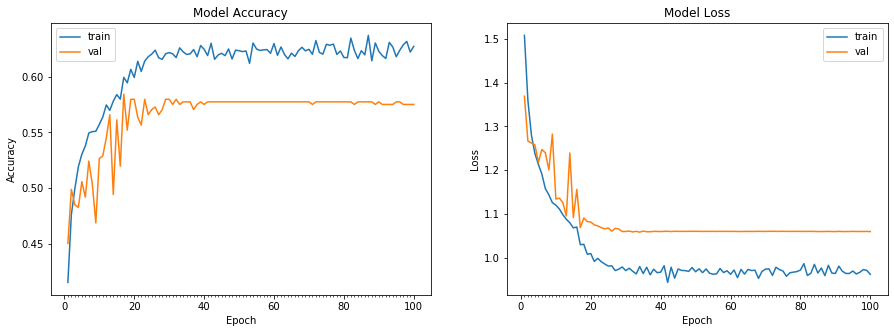

In [52]:
plot_model_history(history)

### ResNet50 Training Results

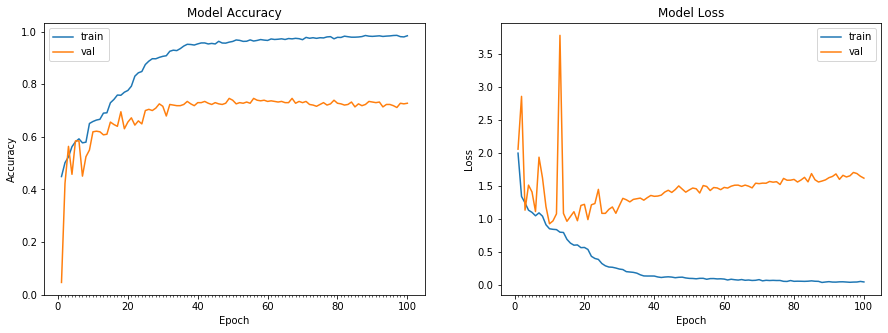

In [53]:
plot_model_history(resnet50_history)

### Ensemble CNN (VGG16 + ResNet50)

In [54]:
from keras.layers import Average

ensembled_models = [vgg16_model, resnet50_model]
outputs = Average()([m.outputs[0] for m in ensembled_models])
ensemble_model = Model(model_input, outputs, name='ensemble')
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
ensemble_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 128, 3)   0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [55]:
loss, accuracy = ensemble_model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = ensemble_model.evaluate(x_validate, y_validate, verbose=1)
print("Ensemble")
print("Validation: val_accuracy = %f  -  val_loss = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  -  loss = %f" % (accuracy, loss))

433/433 [==============================] - 1s 2ms/step
Ensemble
Validation: val_accuracy = 0.727483  -  val_loss = 0.829623
Test: accuracy = 0.731809  -  loss = 0.794557


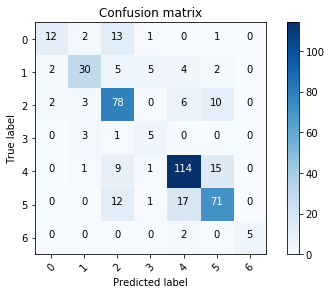

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = ensemble_model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

**Incorrect predictions**

Now, lets which category has much incorrect predictions

Text(0, 0.5, 'Fraction classified incorrectly')

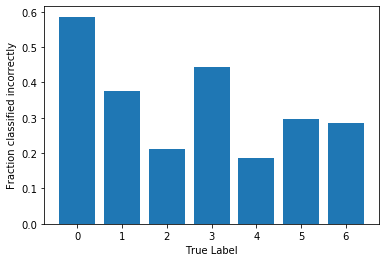

In [57]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

It seems our model has maximum number of incorrect predictions for *Melanocytic nevi code 0*, then second most missclassified type is *Basal cell carcinoma which has code 3*, then the third most missclassified type is *Vascular lesions code 5* and *Actinic keratoses code 4* has least misclassified type.

### Save models

In [58]:
vgg16_model.save('vgg16_weights')
resnet50_model.save('resnet50_weights')
ensemble_model.save('ensemble_classifier')

# Load U-Net segmentation model

![](https://miro.medium.com/max/2000/1*yzbjioOqZDYbO6yHMVpXVQ.jpeg)

This is the code to create the model, model of encoder and decoder completely symmetrical: 
- All conv layers use 3 * 3 and the padding is the same to keep the size.
- Max pooling size 2 * 2, each time for pooling width, height reduced by half, but the layer depth then doubled.
- Up sampling size 2 * 2, each time pooling width, height doubled, but the depth layer then halved.
- Relu activation is used in layers except for the output layer using sigmoid. 

In [59]:
def unet():
    input_shape = (96, 128, 3)
    img_input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)

    # Decoding Layer 
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    
    pred = Reshape((96, 128))(x)
    model = Model(inputs=img_input, outputs=pred)
    model.save('model_best.pth')
    
    return model

unet_model = unet()

### Define helper methods

In [60]:
def enhance(img):
    sub = (unet_model.predict(img.reshape(1,96,128,3))).flatten()

    for i in range(len(sub)):
        if sub[i] > 0.5:
            sub[i] = 1
        else:
            sub[i] = 0
    return sub

In [61]:
import cv2

def applyMask(img):
    mask = np.array(enhance(img).reshape(96, 128), dtype=np.uint8)
    
    res = cv2.bitwise_and(img,img,mask = mask)
    
    return res

## Apply Mask

In [62]:
random_sample_df = skin_df.sample(n=5)
print(random_sample_df['cell_type'].value_counts())

img_list = [img for img in random_sample_df['image']]

seg_img_list = [applyMask(img) for img in img_list]

Benign keratosis-like lesions     2
Melanoma                          1
Melanocytic nevi                  1
Actinic keratoses                 1
Name: cell_type, dtype: int64


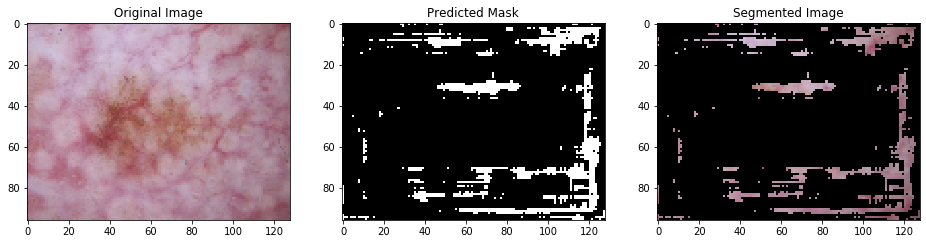

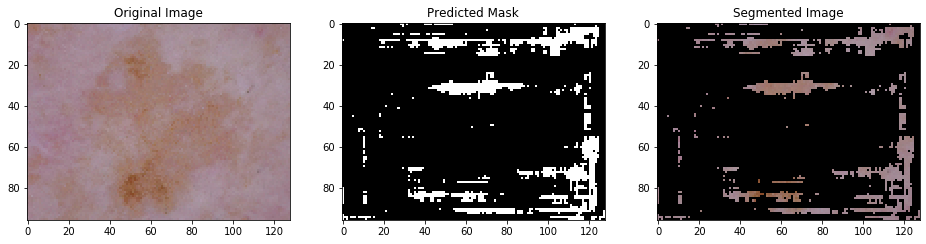

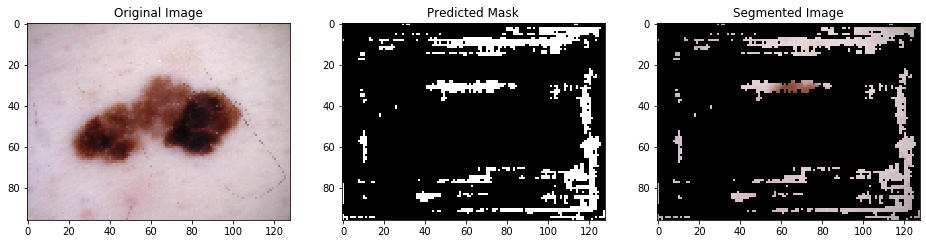

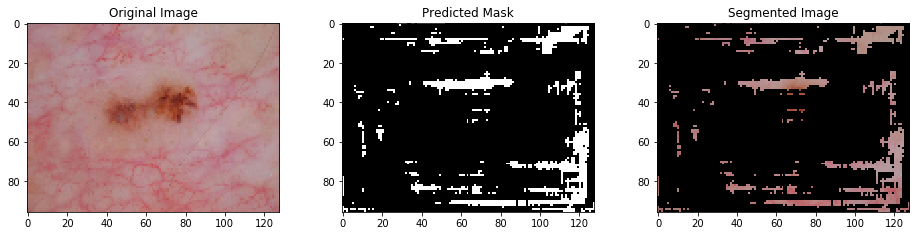

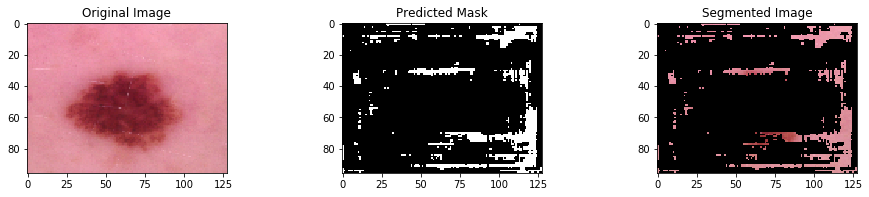

In [63]:
def show_comparison(img_list):
    for i in range(len(img_list)):
        plt.figure(figsize=(16,16))
        plt.subplot(i+1,3,1)
        plt.imshow(img_list[i])
        plt.title('Original Image')
        plt.subplot(i+1,3,2)
        plt.imshow(enhance(img_list[i]).reshape(96, 128), plt.cm.binary_r)
        plt.title('Predicted Mask')
        plt.subplot(i+1,3,3)
        plt.imshow(applyMask(img_list[i]), plt.cm.binary_r)
        plt.title('Segmented Image')
    
show_comparison(img_list)

# Classify Images Segmentation

In [64]:
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.layers import Average


# VGG16 Predictions - Unaltered
validation_batch = np.stack([vgg16_preprocess_input(img) for img in img_list])
pred = vgg16_model.predict(validation_batch)

# VGG16 Predictions - Segmented
segmented_validation_batch = np.stack([vgg16_preprocess_input(img) for img in seg_img_list])
vgg16_seg_pred = vgg16_model.predict(segmented_validation_batch)

# ResNet50 Predictions - Unaltered
resnet_validation_batch = np.stack([resnet50_preprocess_input(img) for img in img_list])
res_pred = resnet50_model.predict(resnet_validation_batch)

# ResNet50 Predictions - Segmented
resnet_segmented_validation_batch = np.stack([resnet50_preprocess_input(img) for img in seg_img_list])
res_seg_pred = resnet50_model.predict(resnet_segmented_validation_batch)

# Ensemble Predictions
e_validation_batch = np.stack([img for img in img_list])
e_seg_validation_batch = np.stack([img for img in img_list])
e_preds = ensemble_model.predict(e_validation_batch)
e_seg_pred = ensemble_model.predict(e_seg_validation_batch)
for p in e_preds: np.random.shuffle(p)
for p in e_seg_pred: np.random.shuffle(p)
print(e_preds)

[[5.1078738e-12 6.7197469e-23 3.2747896e-14 4.2916500e-15 1.0177354e-16
  1.0000000e+00 3.2482917e-16]
 [1.2739168e-19 1.0000000e+00 2.3467526e-17 2.8366599e-16 2.3381119e-17
  1.5657236e-14 2.5554726e-18]
 [5.2746930e-36 5.0000417e-01 1.9440282e-30 9.4736610e-27 1.2703275e-15
  7.0329800e-27 4.9999583e-01]
 [5.0153488e-07 2.9856111e-16 1.2497797e-14 4.5750551e-10 5.6735685e-06
  1.7288312e-10 9.9999386e-01]
 [1.0000000e+00 6.3711371e-31 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.0258225e-30 2.4863046e-19]]


# Ensemble Output

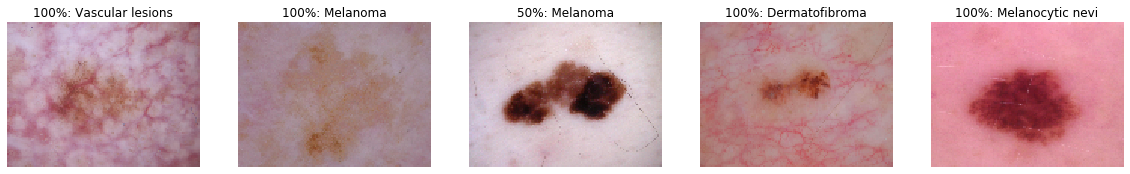

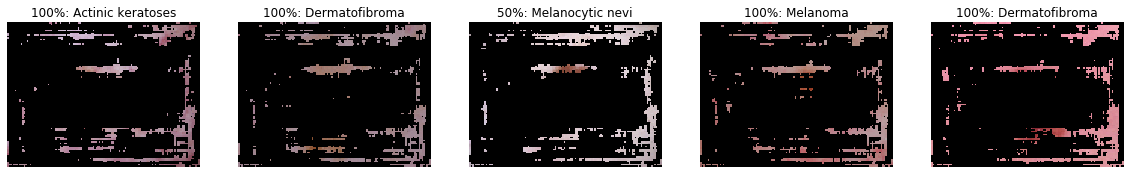

In [65]:
import numpy as np


classes = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]

# Unaltered
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    p_idx = np.argmax(e_preds[i])
    title = "{:.0f}%: {:}".format(100*e_preds[i][p_idx], classes[p_idx])
    ax.set_title(title)
    ax.imshow(img)

# Segmented
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(seg_img_list):
    ax = axs[i]
    ax.axis('off')
    p_idx = np.argmax(e_seg_pred[i])
    title = "{:.0f}%: {:}".format(100*e_seg_pred[i][p_idx], classes[p_idx])
    ax.set_title(title)
    ax.imshow(img)
    